## Compare targets for the dsph KSP paper
Michele Doro
Last update: October 2024

In [1]:
#from dmbounds import dmbounds as bounds
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np

# Define limits files
Extract limits from gDMbounds repository

In [13]:
path  = "../../"
pathb  = "../../dmbounds/bounds/"
steigman = ascii.read(path + "dmbounds/modelpredictions/wimp_steigman2012_numerical.ecsv")

magic_22_mdsph_ann   = ascii.read(pathb + "magic/magic_2022_multidsph_ann_bb.ecsv")
hawc_18_mdsph_ann    = ascii.read(pathb + "hawc/hawc_2018_multidsph_ann_bb_notri2.ecsv")
hess_20_mdsph_ann    = ascii.read(pathb + "hess/hess_2020_multidsph_ann_bb.ecsv")
fermi_20_mdsph_ann   = ascii.read(pathb + "lat/lat_2020_multidsph_ann_bb_oneD_frequentist.ecsv")
fermi_23_mdsph_ann   = ascii.read(pathb + "lat/lat_2023_multidsph_ann_bb_measured.ecsv")
lhaaso_19_mdsph_ann  = ascii.read(pathb + "lhaaso/lhaaso_2019_multidsph_ann_bb_sens.ecsv")
veritas_17_mdsph_ann = ascii.read(pathb +  "veritas/veritas_2017_multidsph_ann_bb.ecsv")



In [14]:
thiswork_stack_einasto_600_bb = ascii.read(path + "sandbox/temp/stack_Wil1_and_CBe_Einasto_600h_bb.csv")

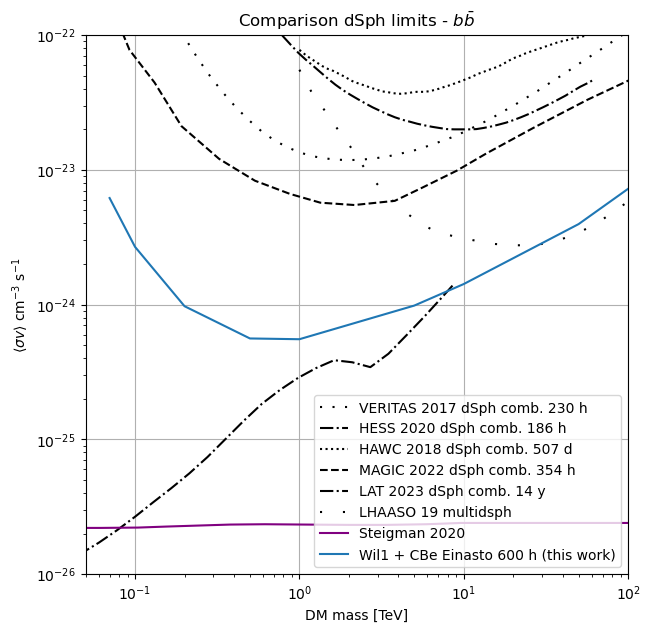

In [18]:
plt.figure(figsize=(7,7))
plt.xlabel("DM mass [TeV]")
plt.ylabel(r"$\langle\sigma v \rangle$ cm$^{-3}$ s$^{-1}$")
plt.xlim(5e-2,1e2)
plt.ylim(1e-26,1e-22)
#plt.title(r'Comparison dSph limits - $\tau^+\tau^-$')
plt.title(r'Comparison dSph limits - $b\bar{b}$')


plt.loglog(veritas_17_mdsph_ann['mass']*1e-3,veritas_17_mdsph_ann['sigmav'],color='k',linestyle=(0, (1, 5)),label="VERITAS 2017 dSph comb. 230 h")
plt.loglog(hess_20_mdsph_ann['mass']*1,hess_20_mdsph_ann['sigmav'],color='k',linestyle='dashdot',label="HESS 2020 dSph comb. 186 h")
plt.loglog(hawc_18_mdsph_ann['mass']*1,hawc_18_mdsph_ann['sigmav'],color='k',linestyle='dotted',label="HAWC 2018 dSph comb. 507 d")
plt.loglog(magic_22_mdsph_ann['mass']*1e-3,magic_22_mdsph_ann['sigmav'],color='k',linestyle='dashed',label="MAGIC 2022 dSph comb. 354 h")
plt.loglog(fermi_23_mdsph_ann['mass']*1e-3,fermi_23_mdsph_ann['sigmav'],color='k',linestyle='dashdot',label="LAT 2023 dSph comb. 14 y")
plt.loglog(lhaaso_19_mdsph_ann['mass'],lhaaso_19_mdsph_ann['sigmav'],color='k',linestyle=(0, (1, 10)),label="LHAASO 19 dSph comb. ")



plt.loglog(steigman['mass']*1e-3,steigman['sigmav'],color='purple',label="Steigman 2020")
#plt.fill_between(steigman['mass']*1e-3, 1e-28, steigman['sigmav'],color='tab:purple',alpha=0.2,label="Steigman 2020")


plt.loglog(thiswork_stack_einasto_600_bb['mass']*1e-3,thiswork_stack_einasto_600_bb['sigmav'],label="Wil1 + CBe Einasto 600 h (this work)")


plt.grid()
#plt.legend(loc="best",ncol=2)
plt.legend(loc="lower right",ncol=1)

#plt.savefig("plot_compare_dsphs_bb.png")